In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from patsy import dmatrices

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Check for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Check how many are zeros
column_names = df.columns
for name in column_names:
    print("Number of zeros in " + name + " = " +  str(len(df[df[name] == 0])))

#Zeros in pregnancies, age, diabetes pedigree function, and outcome should be fine

Number of zeros in Pregnancies = 111
Number of zeros in Glucose = 5
Number of zeros in BloodPressure = 35
Number of zeros in SkinThickness = 227
Number of zeros in Insulin = 374
Number of zeros in BMI = 11
Number of zeros in DiabetesPedigreeFunction = 0
Number of zeros in Age = 0
Number of zeros in Outcome = 500


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
#after dropping skin thick = 0 and before substituting
temp = df[df['SkinThickness'] != 0]

In [8]:
temp = df[df['Insulin'] == 0]
temp[temp['Outcome'] == 1].shape

(138, 9)

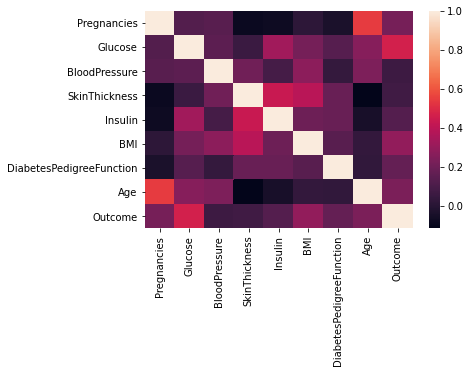

In [9]:
sns.heatmap(df.corr())
sns.set(rc={'figure.figsize':(12,12)})

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

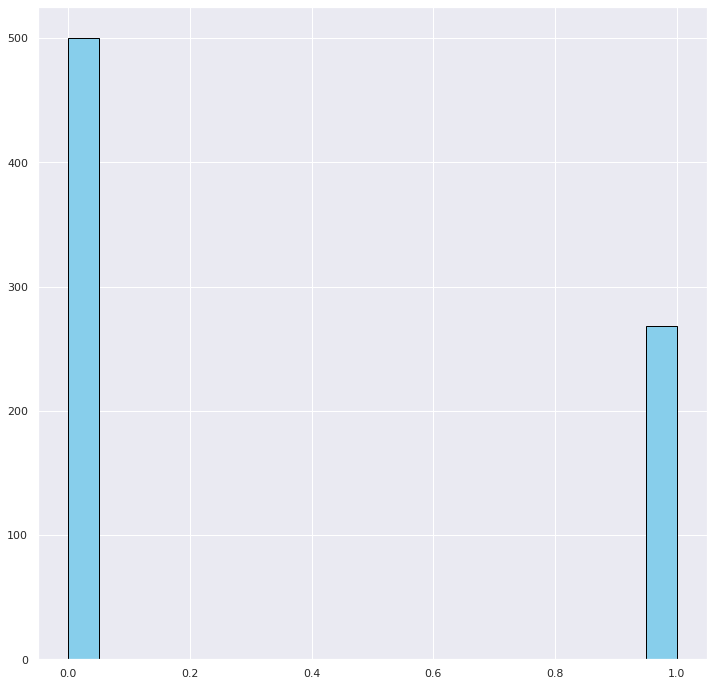

In [10]:
plt.hist(df['Outcome'], bins = 20, ec="black", color = "skyblue")

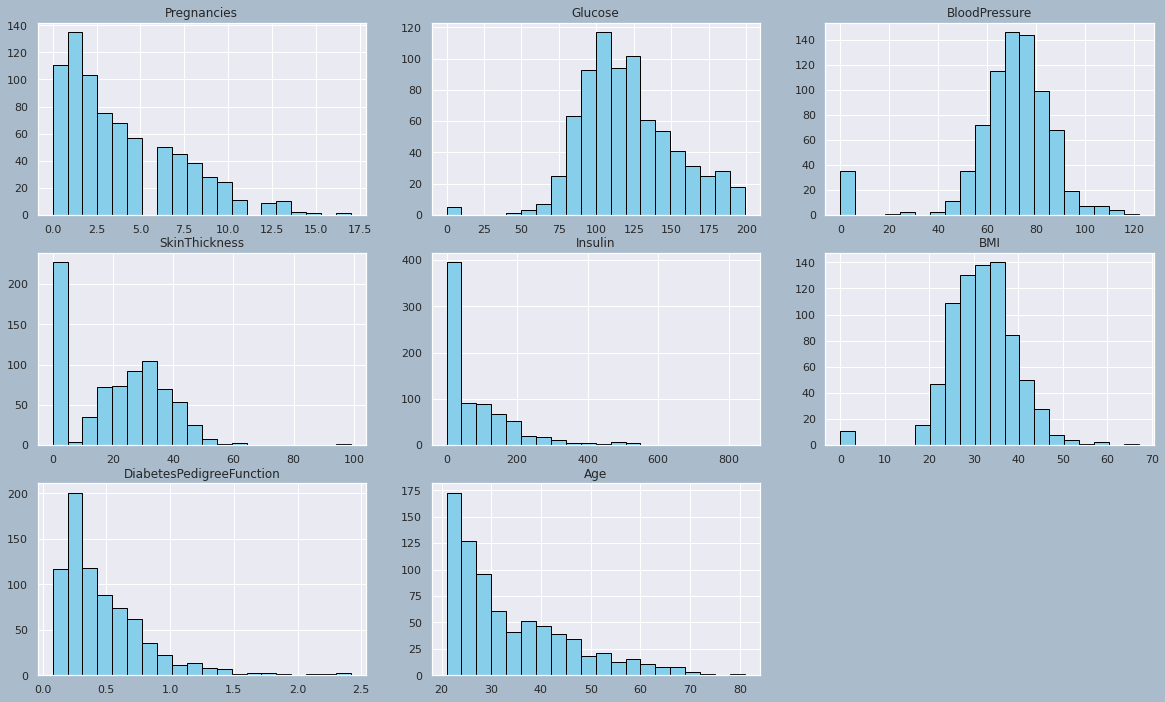

In [11]:
fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

subplot_list = []
for x in range(0,3):
    for y in range(0,3):
        if x != 2 or y != 2:
            subplot_list.append(fig.add_subplot(grid[x,y]))


fig.patch.set_facecolor("#aabbcc")
cols = df.columns
for col, subplot in zip(cols, subplot_list):
    subplot.hist(df[col], bins = 20, ec="black", color = "skyblue")
    subplot.set_title(col)

plt.show()

In [24]:
df_imputer = df.copy(deep =True)
df_imputer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df_imputer['SkinThickness'] = df_imputer['SkinThickness'].replace(0,np.nan)
df_imputer['Insulin'] = df_imputer['Insulin'].replace(0,np.nan)
df_imputer['Glucose'] = df_imputer['Glucose'].replace(0,np.nan)
df_imputer['BloodPressure'] = df_imputer['BloodPressure'].replace(0,np.nan)
df_imputer['BMI'] = df_imputer['BMI'].replace(0,np.nan)
df_imputer = df_imputer.drop('Outcome', axis=1)

In [26]:
count_null_values = df_imputer.isnull().sum()
sum(count_null_values)

652

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=0, max_iter = 652, sample_posterior = True)
temp = imp.fit_transform(df_imputer)
df_imputer = pd.DataFrame(temp)

In [28]:
df_imputer.head()

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.000000,239.031415,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,241.715092,26.6,0.351,31.0
2,8.0,183.0,64.0,28.110196,78.656465,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [30]:
df_imputer['Outcome'] = df['Outcome']
df_imputer.columns = df.columns

In [31]:
df_imputer.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128303,0.210264,0.103960,0.048829,0.018746,-0.033523,0.544341,0.221898
Glucose,0.128303,1.000000,0.234165,0.233435,0.573149,0.228982,0.136286,0.266616,0.490916
BloodPressure,0.210264,0.234165,1.000000,0.247428,0.134336,0.294603,0.003147,0.325731,0.177617
SkinThickness,0.103960,0.233435,0.247428,1.000000,0.197619,0.635751,0.098700,0.141240,0.248838
Insulin,0.048829,0.573149,0.134336,0.197619,1.000000,0.239506,0.107054,0.209712,0.301494
BMI,0.018746,0.228982,0.294603,0.635751,0.239506,1.000000,0.154858,0.018805,0.306846
DiabetesPedigreeFunction,-0.033523,0.136286,0.003147,0.098700,0.107054,0.154858,1.000000,0.033561,0.173844
Age,0.544341,0.266616,0.325731,0.141240,0.209712,0.018805,0.033561,1.000000,0.238356
Outcome,0.221898,0.490916,0.177617,0.248838,0.301494,0.306846,0.173844,0.238356,1.000000


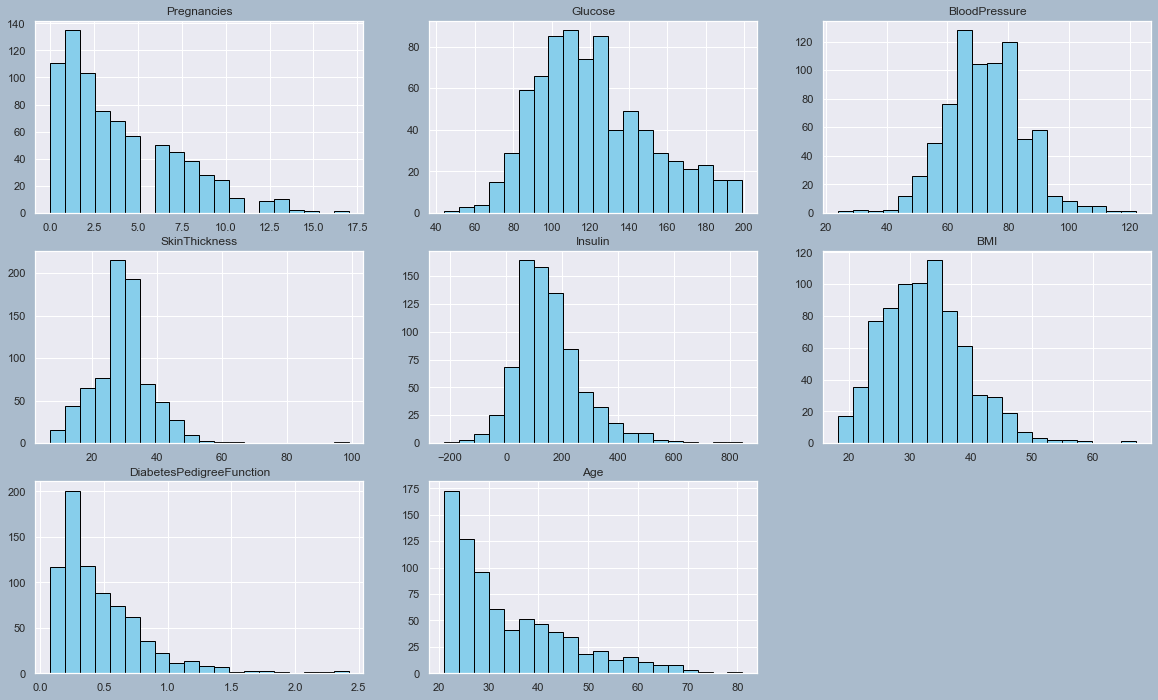

In [28]:
fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

subplot_list = []
for x in range(0,3):
    for y in range(0,3):
        if x != 2 or y != 2:
            subplot_list.append(fig.add_subplot(grid[x,y]))


fig.patch.set_facecolor("#aabbcc")
cols = df.columns
for col, subplot in zip(cols, subplot_list):
    subplot.hist(df_imputer[col], bins = 20, ec="black", color = "skyblue")
    subplot.set_title(col)

plt.show()


In [29]:
column_names = df_imputer.columns
for name in column_names:
    print("Number of zeros in " + name + " = " +  str(len(df_imputer[df_imputer[name] == 0])))

Number of zeros in Pregnancies = 111
Number of zeros in Glucose = 0
Number of zeros in BloodPressure = 0
Number of zeros in SkinThickness = 0
Number of zeros in Insulin = 0
Number of zeros in BMI = 0
Number of zeros in DiabetesPedigreeFunction = 0
Number of zeros in Age = 0
Number of zeros in Outcome = 500


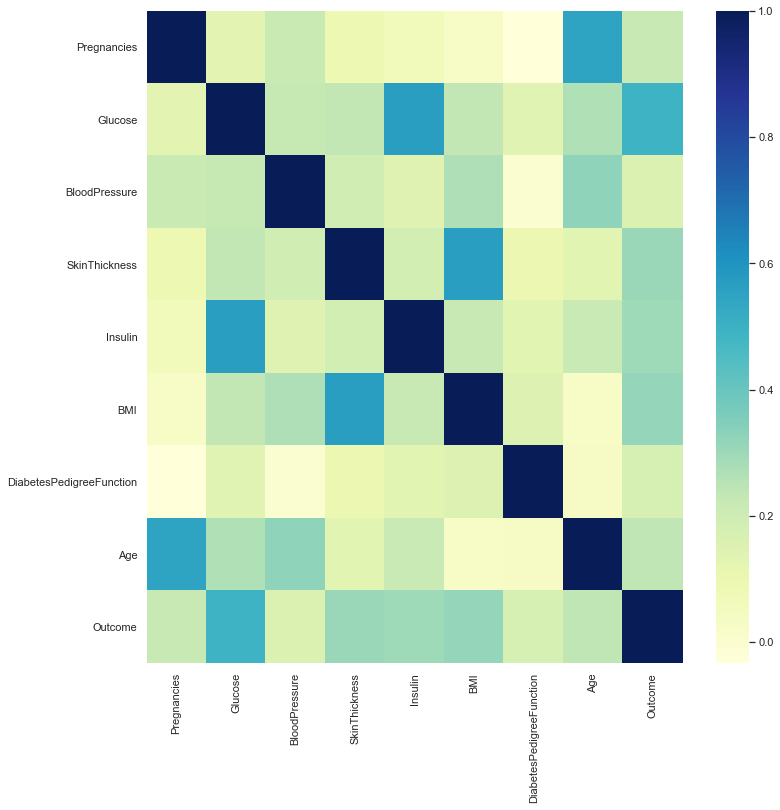

In [30]:
sns.heatmap(df_imputer.corr(), cmap="YlGnBu")

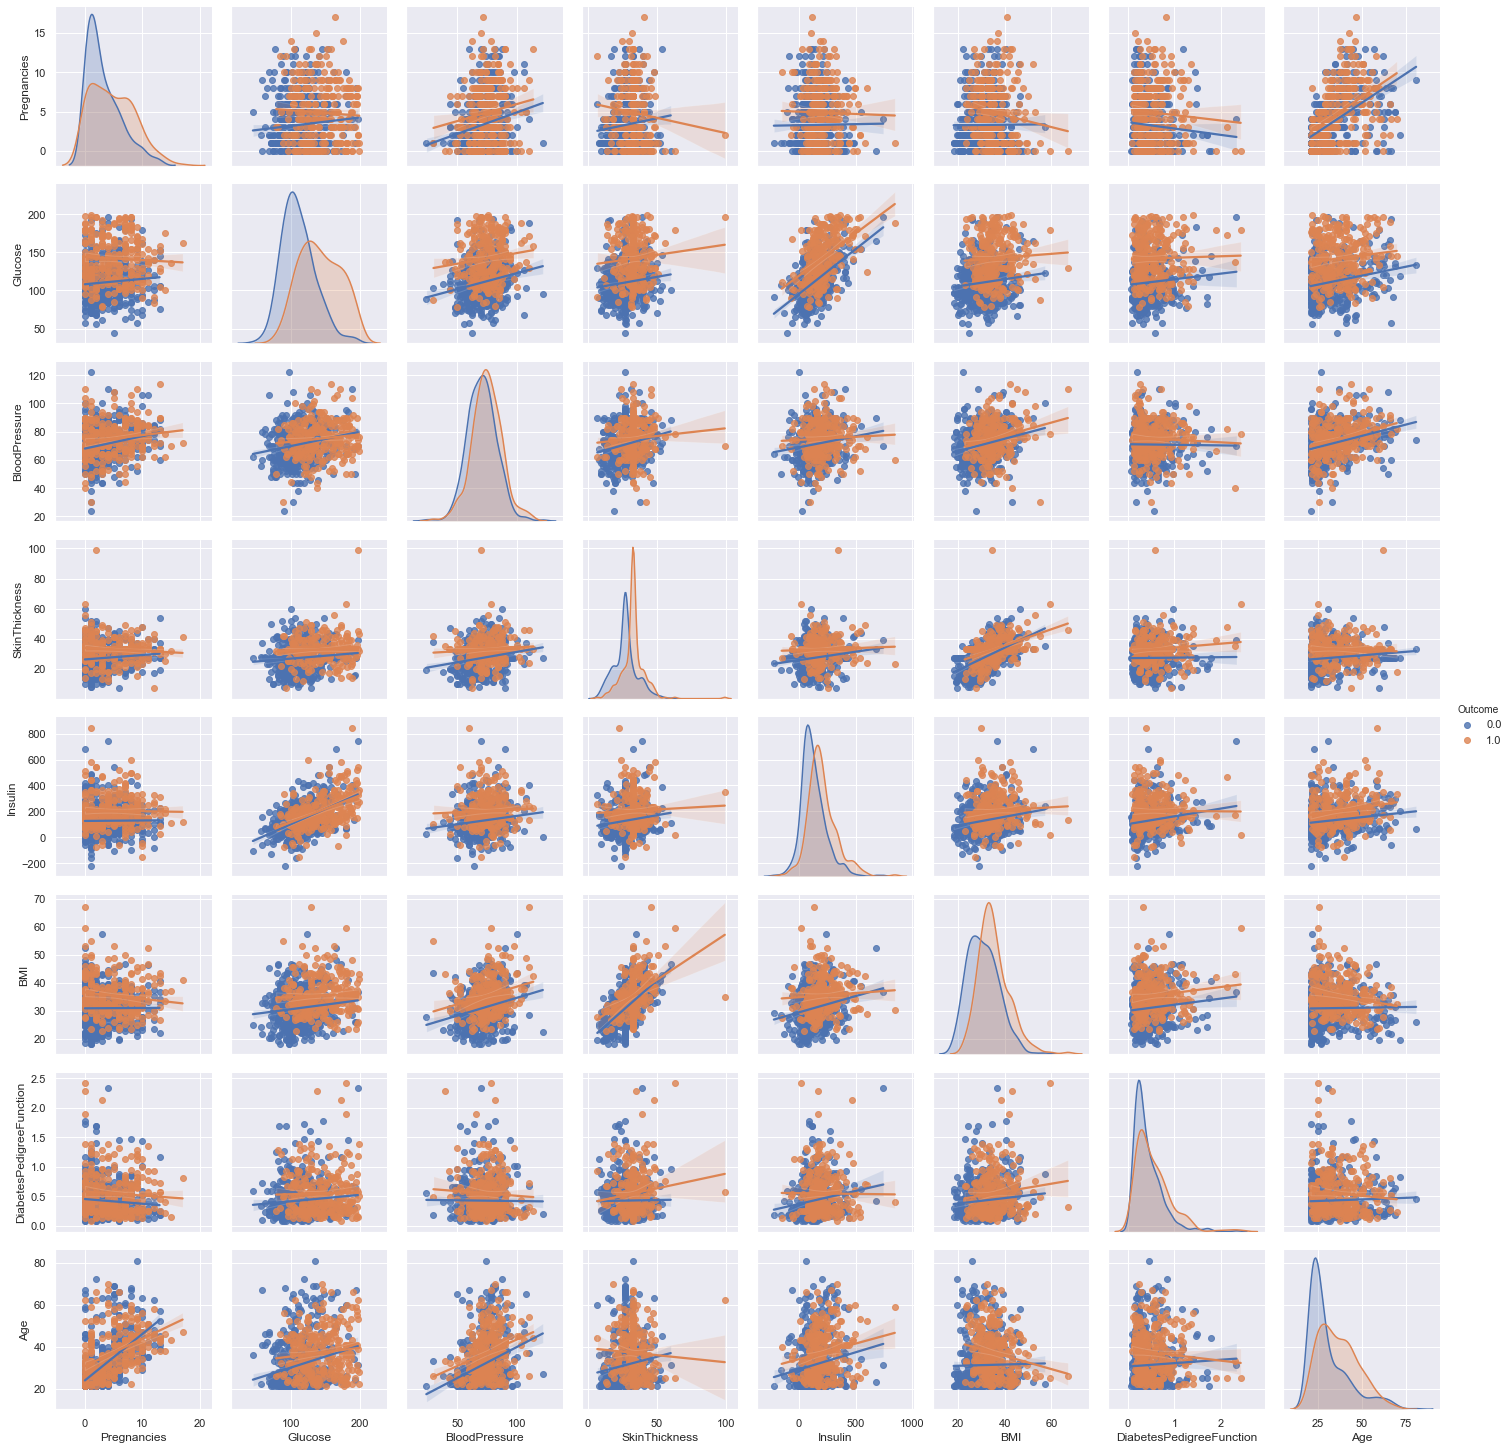

In [31]:
sns.pairplot(df_imputer, kind="reg", hue='Outcome')

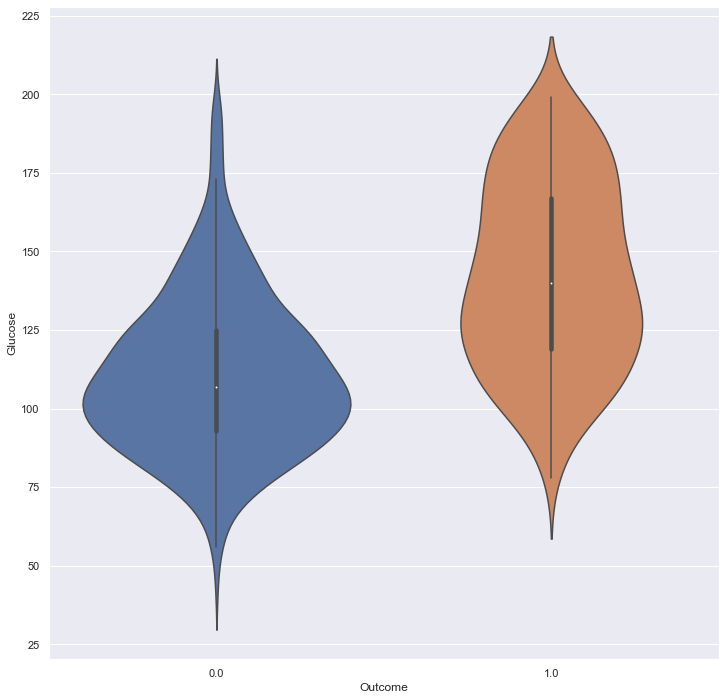

In [32]:
sns.violinplot(data=df_imputer, x = 'Outcome', y = 'Glucose')
sns.set(rc={'figure.figsize':(12,12)})

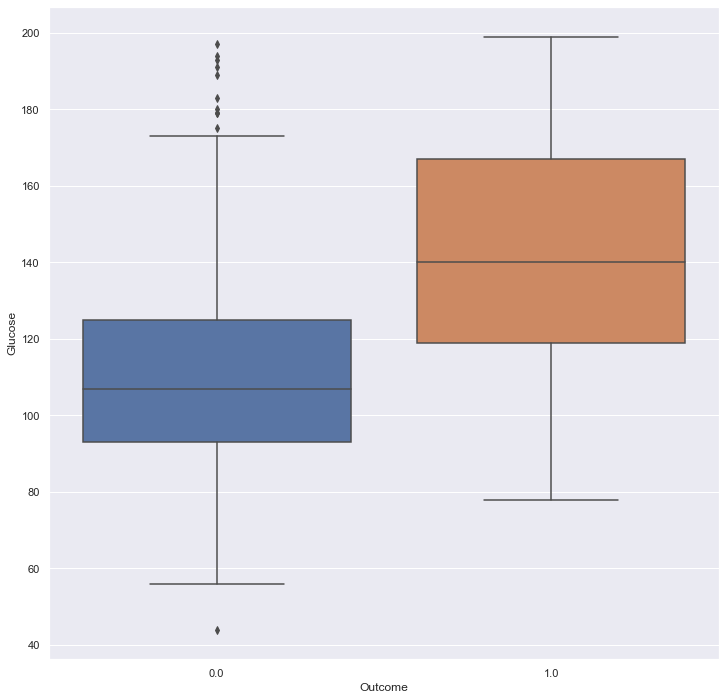

In [33]:
sns.boxplot(data=df_imputer, x = 'Outcome', y = 'Glucose')
sns.set(rc={'figure.figsize':(12,12)})

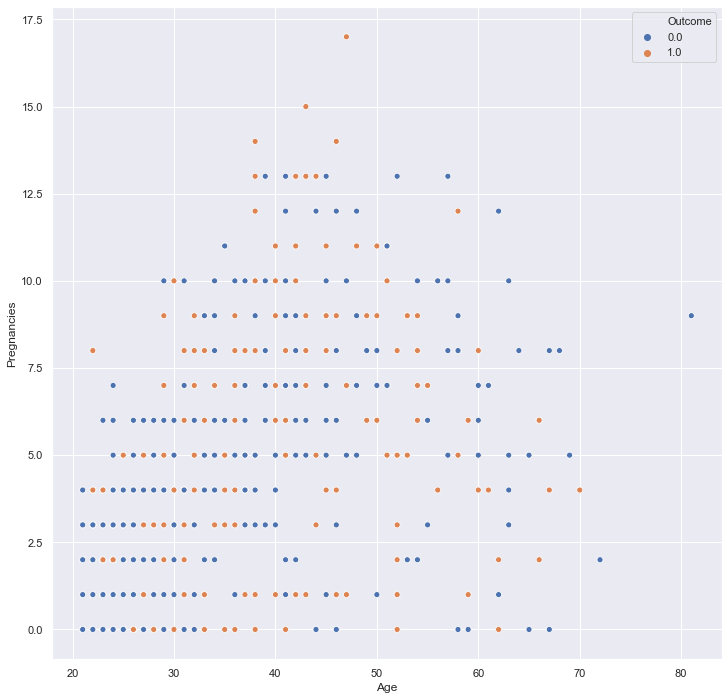

In [34]:
sns.scatterplot(data=df_imputer, x = 'Age', y = 'Pregnancies', hue = 'Outcome')

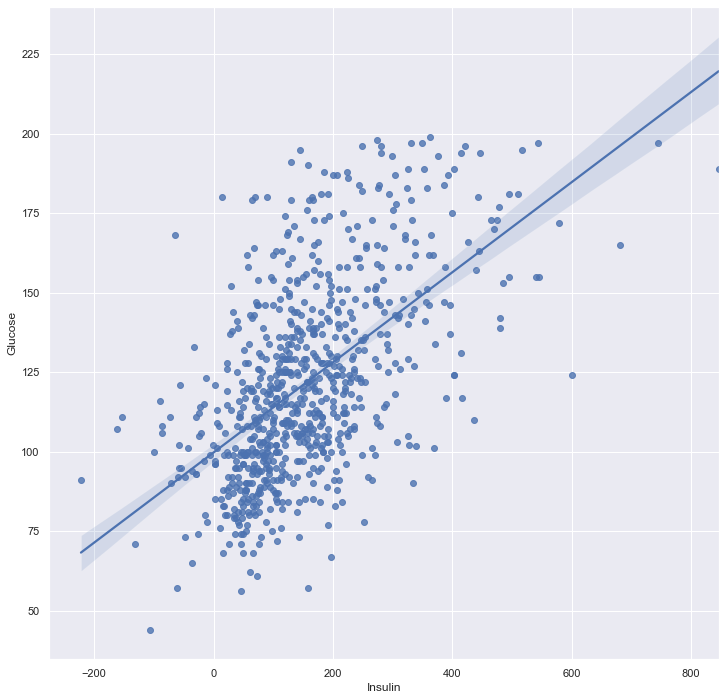

In [35]:
sns.regplot(data=df_imputer, x = 'Insulin', y = 'Glucose')
sns.set(rc={'figure.figsize':(12,12)})

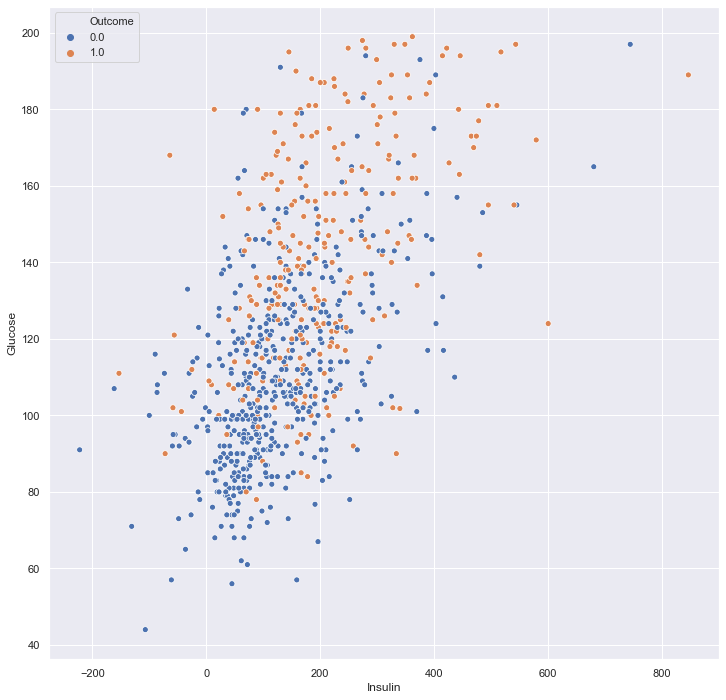

In [36]:
sns.scatterplot(data=df_imputer, x = 'Insulin', y = 'Glucose', hue = 'Outcome')
sns.set(rc={'figure.figsize':(12,12)})

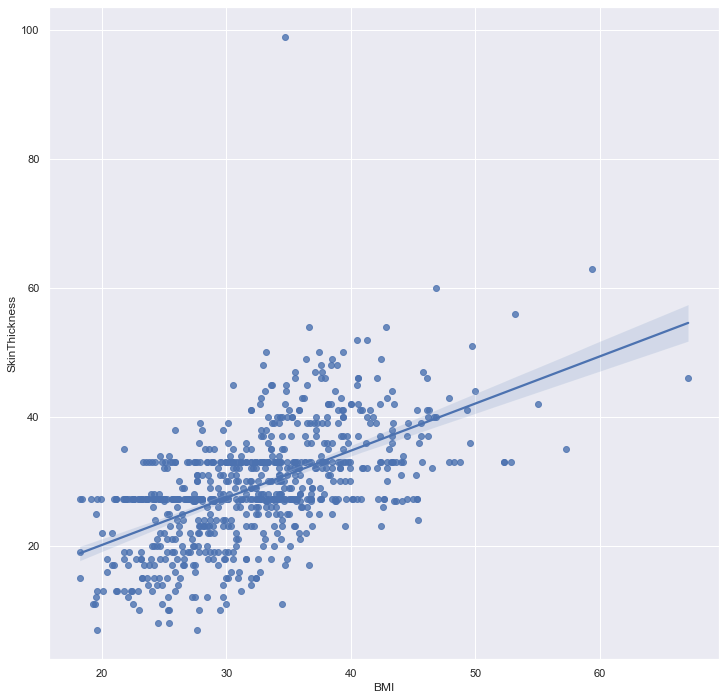

In [37]:
sns.regplot(data=df_imputer, x = 'BMI', y = 'SkinThickness')
sns.set(rc={'figure.figsize':(12,12)})

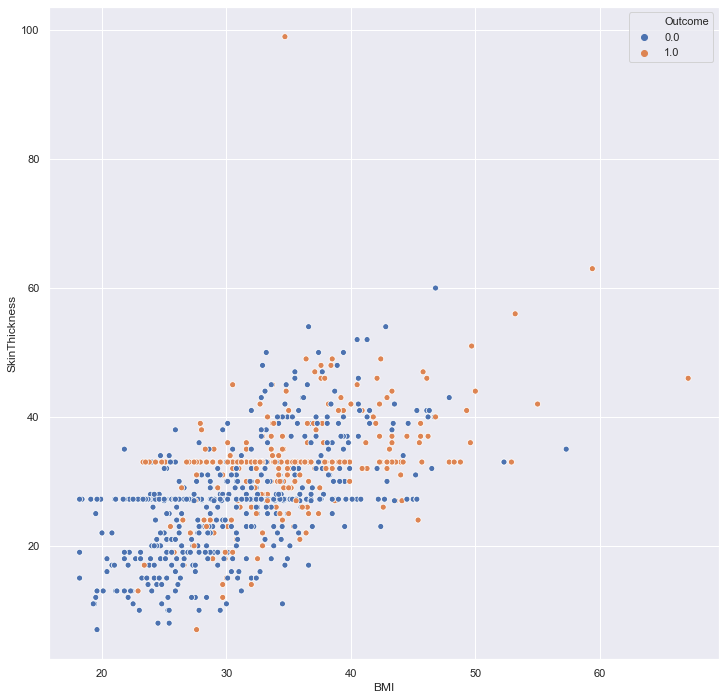

In [38]:
sns.scatterplot(data=df_imputer, x = 'BMI', y = 'SkinThickness', hue = 'Outcome')
sns.set(rc={'figure.figsize':(12,12)})

In [32]:
df_imputer.corr('spearman')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129361,0.188623,0.099246,0.087700,-0.003504,-0.043242,0.607216,0.198689
Glucose,0.129361,1.000000,0.258972,0.222852,0.576881,0.221931,0.089254,0.281984,0.479461
BloodPressure,0.188623,0.258972,1.000000,0.251277,0.172917,0.301956,0.017000,0.369063,0.183560
SkinThickness,0.099246,0.222852,0.251277,1.000000,0.216853,0.646821,0.072532,0.200183,0.245632
Insulin,0.087700,0.576881,0.172917,0.216853,1.000000,0.260135,0.066849,0.241954,0.321659
BMI,-0.003504,0.221931,0.301956,0.646821,0.260135,1.000000,0.135633,0.113138,0.300834
DiabetesPedigreeFunction,-0.043242,0.089254,0.017000,0.072532,0.066849,0.135633,1.000000,0.042909,0.175353
Age,0.607216,0.281984,0.369063,0.200183,0.241954,0.113138,0.042909,1.000000,0.309040
Outcome,0.198689,0.479461,0.183560,0.245632,0.321659,0.300834,0.175353,0.309040,1.000000


### Hypothesis: Skin Thickness, Glucose, Insulin, BMI, and Age

In [158]:
df_imputer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,111.738792,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,2.567566,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,33.0,323.697841,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [33]:
from statsmodels.formula.api import logit
reg = logit('Outcome ~ Insulin+BMI+Glucose+Age', df_imputer).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.482068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Tue, 20 Jul 2021   Pseudo R-squ.:                  0.2547
Time:                        05:13:47   Log-Likelihood:                -370.23
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.449e-53
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1395      0.736    -12.410      0.000     -10.583      -7.696
Insulin       -0.0006      0.001     -0.601      0.548      -0.002       0.001
BMI            0.0914      0.015      6.288      0.000       0.063       0.120
Glucose        0.0364      0.004      9.107      0.000       0.029       0.044
Age            0.0301      0.008      3.903      0.000       0.015       0.045
==============================================================================
"""

In [160]:
Y, X = dmatrices('Outcome ~ Insulin+BMI+Glucose', data=df_imputer, return_type='dataframe')
linearModel = sm.OLS(Y, X)
fittedModel = linearModel.fit()
fittedModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     67.92
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           9.96e-59
Time:                        16:52:34   Log-Likelihood:                -379.12
No. Observations:                 768   AIC:                             770.2
Df Residuals:                     762   BIC:                             798.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0943      0.090    -12.138      0.000      -1.271      -0.917
Insulin        -4.64e-05      0.000     -0.322      0.748      -0.000       0.000
BMI               0.0107      0.003      4.152      0.000       0.006       0.016
Glucose           0.0064      0.001     10.847      0.000       0.005       0.008
SkinThickness     0.0060      0.002      3.042      0.002       0.002       0.010
Age               0.0045      0.001      3.530      0.000       0.002       0.007
==============================================================================
Omnibus:                       44.871   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.803
Skew:                           0.330   Prob(JB):                     9.18e-07
Kurtosis:                       2.342   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inference:
- Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.
- We have a Prob(F-statistic) value very close to 0 so we reject the null hypothesis
- The p-values for BMI, Glucose, And DiabetesPedigreeFunc, Skin Thickness, Age are all less than 0.05

- From the above result, the p-value for Insulin is too high: 0.748. Since it's above 0.05, we fail to reject the Null hypothesis which is 'There is no <u>linear</u> correlation between Insulin and Outcome'
- However, this does not mean there is no correlation at all, it is just that there is no linear correlation

In [34]:
#Shapiro test
import scipy.stats as st

d1= df_imputer[['BMI', 'Glucose', 'Age', 'Insulin', 'Outcome']]

for value in d1.columns:
    temp = np.array(df_imputer[value])
    stat, p = st.shapiro(temp)
    print(value)
    print('stat=%.3f, p=%.8f' % (stat, p))
    
    if p > 0.05:
        print('Probably Gaussian')
    elif p == 0:
        print('Fail')
    else:
        print('Probably not Gaussian')
    print("")

BMI
stat=0.979, p=0.00000001
Probably not Gaussian

Glucose
stat=0.970, p=0.00000000
Probably not Gaussian

Age
stat=0.875, p=0.00000000
Probably not Gaussian

Insulin
stat=0.946, p=0.00000000
Probably not Gaussian

Outcome
stat=0.603, p=0.00000000
Probably not Gaussian



In [35]:
#Spearmen test

import scipy.stats as st

d1= df_imputer[['BMI', 'Glucose', 'Age', 'Insulin']]

d2 = np.array(df_imputer['Outcome'])

for value in d1.columns:
    temp = np.array(df_imputer[value])
    stat, p = st.spearmanr(temp, d2)
    print(value)
    print('stat=%.3f, p=%.8f' % (stat, p))
    
    if p > 0.05:
        print('Probably independent')
    elif p == 0:
        print("Fail")
    else:
        print('Probably dependent')
    print("")

BMI
stat=0.301, p=0.00000000
Probably dependent

Glucose
stat=0.479, p=0.00000000
Probably dependent

Age
stat=0.309, p=0.00000000
Probably dependent

Insulin
stat=0.322, p=0.00000000
Probably dependent



### ML

In [88]:
df_imputer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,111.738792,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,2.567566,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,33.0,323.697841,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1.0


In [37]:
X = df_imputer.drop(['Outcome','Insulin', 'Pregnancies', 
                     'DiabetesPedigreeFunction', 'BloodPressure', 'SkinThickness'],  axis = 1)
Y = df_imputer['Outcome']

### Train + Test

In [38]:

#Using the sklearn train_test_split, we will split the entire
#X and Y dataframe such that training set accounts for 70% of total

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size  = 0.7)

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,max_iter = 768).fit(X_train, Y_train)


In [42]:
lr.score(X_train, Y_train)

0.7783985102420856

In [43]:
lr.score(X_test, Y_test)

0.7532467532467533

In [44]:
lr.score(X, Y)

0.7708333333333334

In [45]:
predictions = lr.predict(X_test)

In [352]:
len(predictions)

154

In [361]:
predictions

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0.])

In [46]:
diff = []
for i in range(0, 154):
    value = abs(Y_test.iloc[i] - predictions[i])
    diff.append(value)

Text(0, 0.5, 'Total number of residuals')

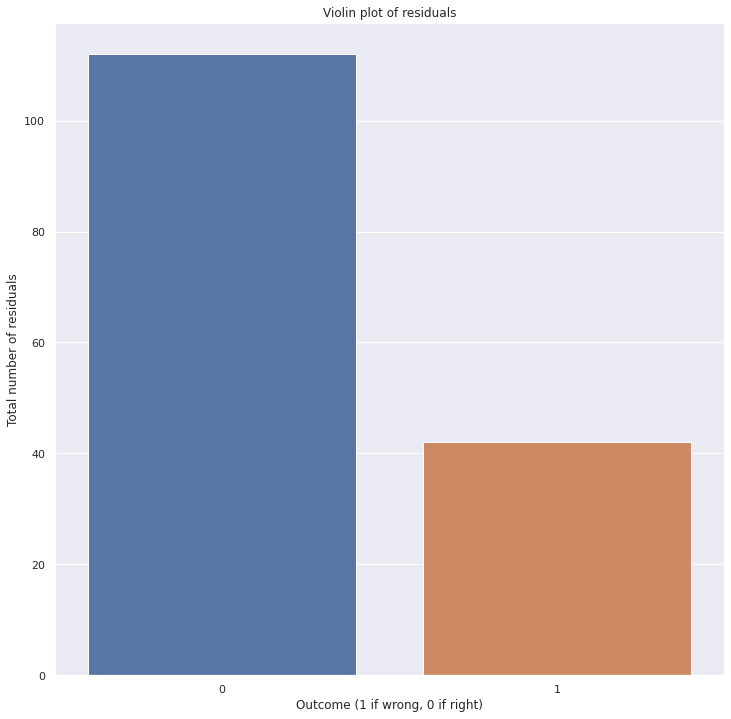

In [50]:
sns.countplot(x=diff)
plt.title("Violin plot of residuals")
plt.xlabel("Outcome (1 if wrong, 0 if right)")
plt.ylabel("Total number of residuals")

### Random forest

In [51]:
X = df_imputer.drop('Outcome', axis = 1)
Y = df_imputer['Outcome']
#Using the sklearn train_test_split, we will split the entire
#X and Y dataframe such that training set accounts for 70% of total

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size  = 0.7)

In [52]:
#Train and fit our model

randomForest = RandomForestClassifier(random_state=0)
randomForest.fit(X_train, Y_train)

rf_predictions = randomForest.predict(X_test)


In [53]:
print(classification_report(Y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       162
           1       0.61      0.74      0.67        69

    accuracy                           0.78       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.80      0.78      0.79       231



In [68]:
conf_matrix_grid = confusion_matrix(Y_test, rf_predictions)
print(conf_matrix_grid)
flat = conf_matrix_grid.flatten()
score = (flat[0] + flat[3]) / flat.sum()
print(score)

[[130  32]
 [ 18  51]]
0.7835497835497836


In [62]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num=15)] 
max_features = ['auto', 'sqrt', 'log2', 0.6]
max_depth = [int(x) for x in np.linspace(start=2, stop=15, num=7)]
max_depth.extend([50, None])
min_samples_split = [2, 5, 8, 14, 20]
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]
max_leaf_nodes = [50, 100, 200, 300, 400, 500, 600, None]

print(n_estimators)
print(max_depth)

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
             'max_leaf_nodes': max_leaf_nodes, 
              }

randomForest2 = RandomForestClassifier(random_state = 0)
r_clf = RandomizedSearchCV(randomForest2, random_grid, n_iter=100, cv = 10, random_state=42, n_jobs = -1)

[20, 161, 302, 444, 585, 727, 868, 1009, 1151, 1292, 1434, 1575, 1717, 1858, 2000]
[2, 4, 6, 8, 10, 12, 15, 50, None]


In [63]:
#r_clf.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': ([True, False],),
                                        'max_depth': [2, 4, 6, 8, 10, 12, 15,
                                                      50, None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.6],
                                        'max_leaf_nodes': [50, 100, 200, 300,
                                                           400, 500, 600,
                                                           None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 8, 14, 20],
                                        'n_estimators': [20, 161, 302, 444, 585,
                                                         727, 868, 100

In [69]:
rand_predictions = r_clf.predict(X_test)
conf_matrix_grid = confusion_matrix(Y_test, rand_predictions)
print(conf_matrix_grid)
flat = conf_matrix_grid.flatten()
score = (flat[0] + flat[3]) / flat.sum()
print(score)

[[138  24]
 [ 22  47]]
0.8008658008658008


In [64]:
r_clf.best_params_

{'n_estimators': 161,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_leaf_nodes': 600,
 'max_features': 'log2',
 'max_depth': 12,
 'bootstrap': [True, False]}

In [72]:
r_clf.cv_results_['mean_score_time']

array([0.00536268, 0.10446186, 0.10902689, 0.02499182, 0.221889  ,
       0.13029497, 0.21886601, 0.02870722, 0.17790229, 0.07722576,
       0.13462048, 0.15497491, 0.1167403 , 0.09149928, 0.11470225,
       0.00551972, 0.10992455, 0.08989108, 0.02609606, 0.09345994,
       0.15042019, 0.0051985 , 0.30144093, 0.14236372, 0.16969626,
       0.26589131, 0.23024714, 0.04436717, 0.10940716, 0.22470078,
       0.2004678 , 0.28623543, 0.20935838, 0.13403232, 0.16691926,
       0.14235098, 0.1964215 , 0.04613912, 0.11272285, 0.23957257,
       0.29591639, 0.15549843, 0.04759803, 0.08482232, 0.23187921,
       0.15243952, 0.04475896, 0.06726894, 0.17595491, 0.00553384,
       0.28780448, 0.14493678, 0.23108258, 0.23323693, 0.29253118,
       0.04502292, 0.04472141, 0.31299701, 0.173926  , 0.00562603,
       0.04680338, 0.04548724, 0.16795082, 0.09347627, 0.14580891,
       0.26174581, 0.00515251, 0.23992209, 0.29075937, 0.0472738 ,
       0.23086498, 0.02271218, 0.25241427, 0.00570281, 0.21107

In [70]:
#Train and fit our model
#
n_estimators = [100, 125, 150, 160, 175, 200, 250] 
max_features = ['auto', 'sqrt', 'log2', 0.6]
max_depth = [7, 10, 11, 12, 13, 15]
min_samples_split = [10, 15, 20, 30, 40]
min_samples_leaf = [8, 10, 12, 15]
bootstrap = [True, False]
max_leaf_nodes = [500, 550, 600, 650, 700, 800]


parameters = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
             'max_leaf_nodes': max_leaf_nodes}

clf = GridSearchCV(randomForest2, parameters, cv = 10, n_jobs = -1)


In [71]:
clf.fit(X_train, Y_train)

KeyboardInterrupt: 

In [337]:
grid_predictions = clf.predict(X_test)

In [338]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       104
         1.0       0.71      0.74      0.73        50

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.82      0.82      0.82       154



In [339]:
conf_matrix_grid = confusion_matrix(Y_test, grid_predictions)
print(conf_matrix_grid)

[[89 15]
 [13 37]]


In [336]:
clf.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 25}

Text(0.5, 1, 'Confusion Matrix on the Test Data')

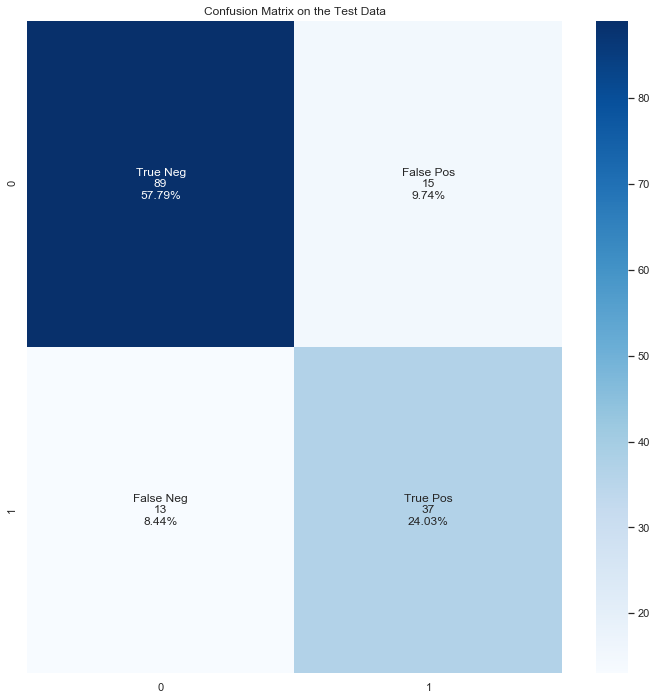

In [340]:
names = ['True Negative','False Positive','False Negative','True Positive']

flatten = conf_matrix_grid.flatten()

counts = [value for value in flatten]

percentages = ["{0:.2%}".format(value) for value in
                    flatten/np.sum(conf_matrix_grid)]

labels = []


for i in range(0,4):
    label = f"{names[i]}\n{counts[i]}\n{percentages[i]}"
    labels.append(label)

labels = np.asarray(labels).reshape(2,2)

g = sns.heatmap(conf_matrix_grid, annot=labels, fmt='', cmap='Blues');

g.set_title("Confusion Matrix on the Test Data")